In [1]:
from astropy.io import fits
import numpy as np
import sep

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse
import matplotlib.colors as colors

rcParams['figure.figsize']=[10.,8.]

In [3]:
def img_analysis(image,thresh, bitswap=False):
    data = fits.getdata(image)
    if bitswap:
        data = data.byteswap(inplace=True).newbyteorder()
    m = np.mean(data)
    s = np.std(data)
    plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
    plt.colorbar()
    plt.show()
    bkg = sep.Background(data)
    bkg = sep.Background(data, mask=None, bw=64, bh=64, fw=3, fh=3)
    print("Global Background: "+str(bkg.globalback))
    print("Global RMS: "+str(bkg.globalrms))
    bkg_image = bkg.back()
    plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
    plt.colorbar()
    plt.show()

    bkg_rms = bkg.rms()
    data_sub = data - bkg


    plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
    plt.colorbar()
    plt.show()

    objects = sep.extract(data_sub, thresh, err=bkg.globalrms)
    print("Number of objects: = "+str(len(objects)))

    # plot background-subtracted image
    fig, ax = plt.subplots()
    m, s = np.mean(data_sub), np.std(data_sub)
    im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
                   vmin=m-s, vmax=m+s, origin='lower')

    # plot an ellipse for each object
    for i in range(len(objects)):
        e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                    width=6*objects['a'][i],
                    height=6*objects['b'][i],
                    angle=objects['theta'][i] * 180. / np.pi)
        e.set_facecolor('none')
        e.set_edgecolor('red')
        ax.add_artist(e)
    plt.show()

ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]


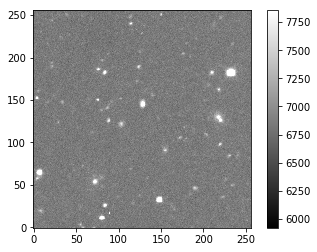

Global Background: 6852.04931640625
Global RMS: 65.46174621582031


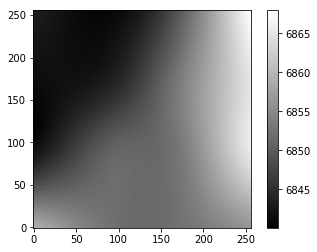

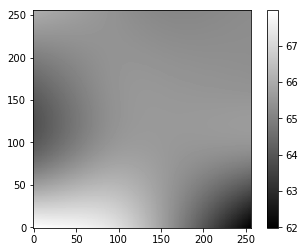

Number of objects: = 68


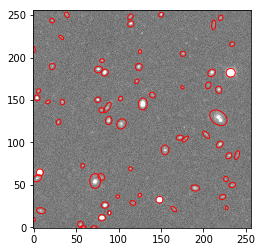

In [4]:
img_analysis("image.fits", thresh=1.5)

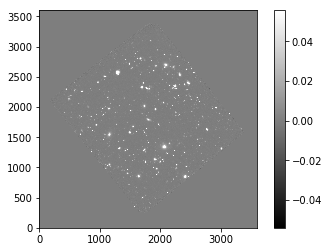

Global Background: 0.0
Global RMS: 0.0005398219218477607


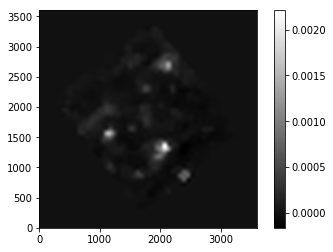

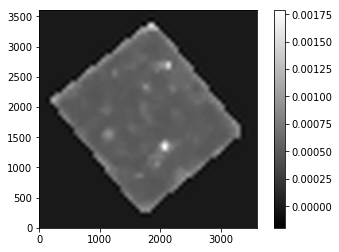

Number of objects: = 2414


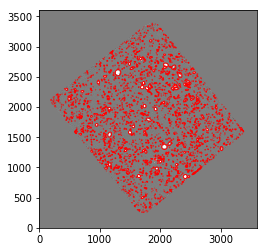

In [6]:
img_analysis("f105w.fits", 5.5, bitswap=True)

In [22]:
image = fits.getdata("image.fits")
image = image.byteswap(inplace=True).newbyteorder()
image = image/np.max(image)

f105w = fits.getdata("f105w.fits")
f105w = f105w.byteswap(inplace=True).newbyteorder()
f105w = f105w/np.max(f105w)

f125w = fits.getdata("f125w.fits")
f125w = f125w.byteswap(inplace=True).newbyteorder()
f125w = f125w/np.max(f125w)

f160w = fits.getdata("f160w.fits")
f160w = f160w.byteswap(inplace=True).newbyteorder()
f160w = f160w/np.max(f160w)

ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]


/Users/Aline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/Aline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
/Users/Aline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/Aline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/Users/Aline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/Aline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


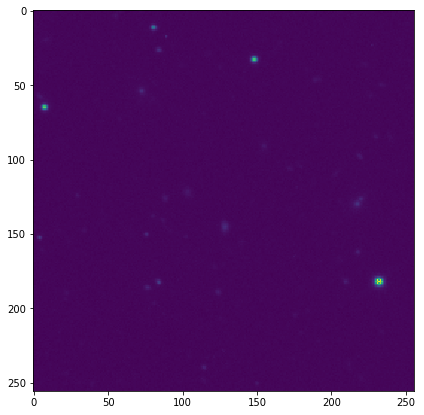

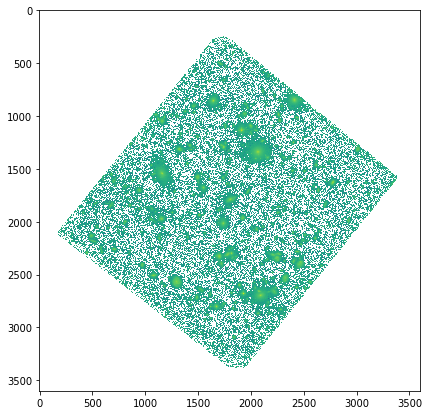

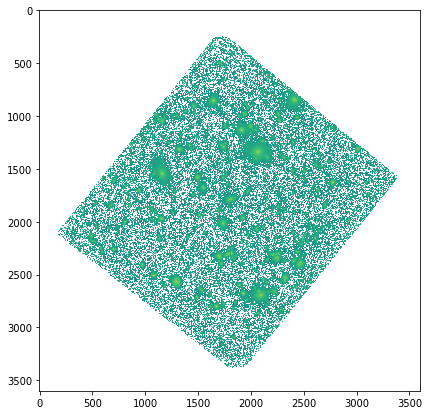

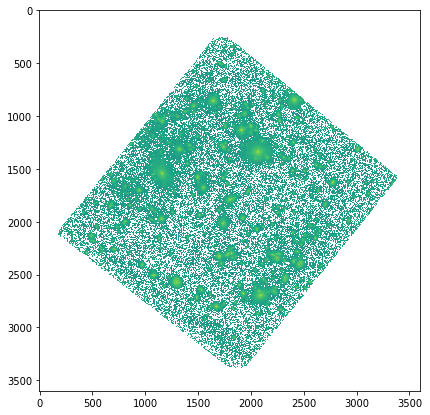

In [24]:
image_log = np.log10(image)
f = plt.figure(figsize=(7,7))
plt.imshow(image_log)

f105w_log = np.log(f105w)
f = plt.figure(figsize=(7,7))
plt.imshow(f105w_log)

f125w_log = np.log(f125w)
f = plt.figure(figsize=(7,7))
plt.imshow(f125w_log)

f160w_log = np.log(f160w)
f = plt.figure(figsize=(7,7))
plt.imshow(f160w_log)



/Users/Aline/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/Users/Aline/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


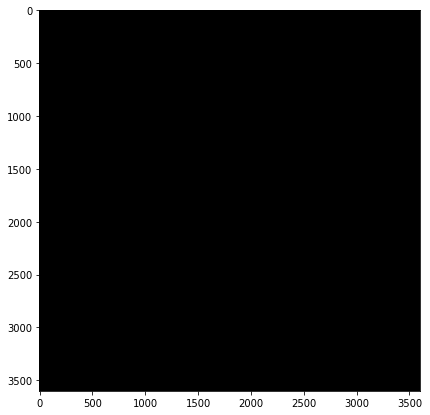

In [44]:
f105w_min = f105w_log.min()
f105w_max = f105w_log.max()

v = (f105w_log - f105w_min)/(f105w_max - f105w_min)
s = 0.8 - v

f105w_min = f105w_log.min()
f105w_max = f105w_log.max()

h = 0.8-2.0*(f105w_log - f105w_min)/(f105w_max - f105w_min)

f105w = np.zeros((3600, 3600, 3))

f105w[:, :, 0] = h
f105w[:, :, 1] = s
f105w[:, :, 2] = v

rgb_image = colors.hsv_to_rgb(f105w)

f = plt.figure(figsize=(7,7))
plt.imshow(f105w)